In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
21/31 [===================>..........] - ETA: 0s - loss: 1.6619 - accuracy: 0.1998  
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 2s 7ms/step - loss: 1.6425 - accuracy: 0.2140 - val_loss: 1.5343 - val_accuracy: 0.2832
Epoch 2/1000
23/31 [=====================>........] - ETA: 0s - loss: 1.5441 - accuracy: 0.2880
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.5278 - accuracy: 0.3013 - val_loss: 1.4437 - val_accuracy: 0.4435
Epoch 3/1000
22/31 [====================>.........] - ETA: 0s - loss: 1.4488 - accuracy: 0.3675
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.4431 - accuracy: 0.3692 - val_loss: 1.3423 - val_accuracy: 0.5046
Epoch 4/1000
23/31 [=====================>........] - ETA: 0s - loss: 1.3881 - accuracy: 0.3947

24/31 [======================>.......] - ETA: 0s - loss: 0.7954 - accuracy: 0.6829
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8044 - accuracy: 0.6830 - val_loss: 0.4830 - val_accuracy: 0.9069
Epoch 29/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.8094 - accuracy: 0.6843
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8132 - accuracy: 0.6819 - val_loss: 0.4707 - val_accuracy: 0.9061
Epoch 30/1000
17/31 [===============>..............] - ETA: 0s - loss: 0.8089 - accuracy: 0.6760
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.7984 - accuracy: 0.6850 - val_loss: 0.4669 - val_accuracy: 0.9099
Epoch 31/1000
18/31 [================>.............] - ETA: 0s - loss: 0.7853 - accuracy: 0.6862
Epoch 31

17/31 [===============>..............] - ETA: 0s - loss: 0.6899 - accuracy: 0.7477
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.7067 - accuracy: 0.7351 - val_loss: 0.3306 - val_accuracy: 0.9321
Epoch 56/1000
17/31 [===============>..............] - ETA: 0s - loss: 0.6920 - accuracy: 0.7385
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6809 - accuracy: 0.7412 - val_loss: 0.3340 - val_accuracy: 0.9275
Epoch 57/1000
18/31 [================>.............] - ETA: 0s - loss: 0.6738 - accuracy: 0.7604
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.7537 - val_loss: 0.3303 - val_accuracy: 0.9260
Epoch 58/1000
18/31 [================>.............] - ETA: 0s - loss: 0.6833 - accuracy: 0.7474
Epoch 58

30/31 [============================>.] - ETA: 0s - loss: 0.6287 - accuracy: 0.7695
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.7695 - val_loss: 0.2921 - val_accuracy: 0.9351
Epoch 83/1000
31/31 [==============================] - ETA: 0s - loss: 0.6351 - accuracy: 0.7659
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6351 - accuracy: 0.7659 - val_loss: 0.2947 - val_accuracy: 0.9344
Epoch 84/1000
31/31 [==============================] - ETA: 0s - loss: 0.6176 - accuracy: 0.7697
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.7697 - val_loss: 0.2816 - val_accuracy: 0.9420
Epoch 85/1000
31/31 [==============================] - ETA: 0s - loss: 0.6417 - accuracy: 0.7674
Epoch 85

20/31 [==================>...........] - ETA: 0s - loss: 0.6202 - accuracy: 0.7836
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.7870 - val_loss: 0.2775 - val_accuracy: 0.9405
Epoch 110/1000
20/31 [==================>...........] - ETA: 0s - loss: 0.5943 - accuracy: 0.7746
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.7720 - val_loss: 0.2605 - val_accuracy: 0.9435
Epoch 111/1000
23/31 [=====================>........] - ETA: 0s - loss: 0.5858 - accuracy: 0.7846
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.7786 - val_loss: 0.2722 - val_accuracy: 0.9321
Epoch 112/1000
23/31 [=====================>........] - ETA: 0s - loss: 0.6148 - accuracy: 0.7806
Ep

Epoch 136/1000
17/31 [===============>..............] - ETA: 0s - loss: 0.5692 - accuracy: 0.7987
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5816 - accuracy: 0.7921 - val_loss: 0.2642 - val_accuracy: 0.9427
Epoch 137/1000
17/31 [===============>..............] - ETA: 0s - loss: 0.6037 - accuracy: 0.7790
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.6061 - accuracy: 0.7774 - val_loss: 0.2687 - val_accuracy: 0.9344
Epoch 138/1000
19/31 [=================>............] - ETA: 0s - loss: 0.5860 - accuracy: 0.7714
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.7837 - val_loss: 0.2648 - val_accuracy: 0.9412
Epoch 139/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.6029 - accu

Epoch 163/1000
31/31 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.7888
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5766 - accuracy: 0.7888 - val_loss: 0.2592 - val_accuracy: 0.9504
Epoch 164/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.5819 - accuracy: 0.7864
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5871 - accuracy: 0.7845 - val_loss: 0.2549 - val_accuracy: 0.9435
Epoch 165/1000
15/31 [=============>................] - ETA: 0s - loss: 0.5685 - accuracy: 0.7849
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5833 - accuracy: 0.7842 - val_loss: 0.2503 - val_accuracy: 0.9550
Epoch 166/1000
18/31 [================>.............] - ETA: 0s - loss: 0.5373 - accu

Epoch 190/1000
31/31 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.7962
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7962 - val_loss: 0.2574 - val_accuracy: 0.9527
Epoch 191/1000
31/31 [==============================] - ETA: 0s - loss: 0.5537 - accuracy: 0.8000
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5537 - accuracy: 0.8000 - val_loss: 0.2565 - val_accuracy: 0.9489
Epoch 192/1000
31/31 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.7972
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7972 - val_loss: 0.2519 - val_accuracy: 0.9504
Epoch 193/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.5662 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9527


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.2965287e-03 1.4766972e-01 8.4000903e-01 2.7691535e-04 8.7478152e-03]
2


# Confusion matrix

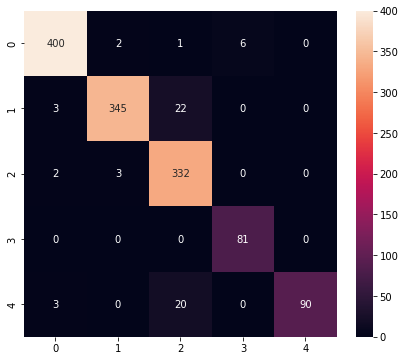

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       409
           1       0.99      0.93      0.96       370
           2       0.89      0.99      0.93       337
           3       0.93      1.00      0.96        81
           4       1.00      0.80      0.89       113

    accuracy                           0.95      1310
   macro avg       0.96      0.94      0.94      1310
weighted avg       0.96      0.95      0.95      1310



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ryan6\AppData\Local\Temp\tmpwrroaltm\assets


6464

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.2965273e-03 1.4766975e-01 8.4000903e-01 2.7691509e-04 8.7478170e-03]
2
